# DIT821 Software Engineering for AI systems

DIT821 labs are derived from excercises from Coursera Machine Learning course. 

<div class="alert alert-block alert-warning">
You are supposed to solve them yourself and submit the solutions. Further, you will be asked individually to explan the labs, in particuar the parts that you have written. The labs will be approved upon sucssesful correct submission and discussion. 
</div>


* Name, e-mail: Hannah Shiels, gusshieha@student.gu.se
* Name, e-mail: Maryam Esmaeili Darestani, gusesmama@student.gu.se
* Name, e-mail: Shahrzad Sheikholeslami, gussheish@student.gu.se

# Programming Exercise 10: Data Management

In this lab exercise, you will check the consistency of annotations for a selected set of images. You are provided with 10 images, and for each image there are a number of different judgements (a single judgement is one persons opinion about what the annotation should look like).  

For each image you have a corresponding .json file that contains all of the judgements for said image. The top-level key-value pairs of the .json file correspond to judgement_number - judgement. In turn, each judgement corresponds to a list of objects, where each object contains a number of different keys that inform you about the object-class, position of the extreme points (top, right, left, bottom) and so on. 


You will need the following libraries<br><br>
- **scipy**: For advanced mathematical routines <br>
- **numpy**: For N-dimensional array manipulation <br>
- **matplotlib**: For 2D plotting <br>
- **JSON**: For processing JSON file <br>


## Files included in this exercise:

- **Annotation_consistency**
    - images (in jpg format) 
    - jugements (also annotations in json format)

## Where to get help:

- **Working with pillow and matplotlib**:
    - images (imread,imshow): <https://matplotlib.org/tutorials/introductory/images.html>
    - patches.Rectangle: <https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.patches.Rectangle.html>
    - pillow:<https://pillow.readthedocs.io/en/stable/reference/Image.html>
    
- **Working json**: 
    - Read json file: <https://realpython.com/python-json/#serializing-json>
    


In [1]:
# Manipulating directory paths 
import os

# Manipulating json files
import json

# Plotting library
import matplotlib.pyplot as plt

# Plotting  and manipulating image, bounding box
from matplotlib import image
import matplotlib.patches as patches
import matplotlib.cm as mpcm
import numpy as np
# tells matplotlib to embed plots within the notebook
%matplotlib inline


## Submission
For this programming exercise you are required to check the consistency of annotations. The following is a breakdown of how each part of this exercise.  
- *Step 1: Draw all boxes from one single annotator onto one image*<br>
- *Step 2: Draw all boxes avalibale for the same image onto the image*<br>
- *Step 3: Pick two boxes corresponding to the same object and draw them together c*<br>
- *Step 4: Compute the IOU between them*<br>

# Annotation consistency

High quality data is important in machine learning. However, data quality can suffer as a result of manual labelling. Even when annotation guidelines are provided to human labelers, the labels can be inconsistent. One way to evaluate quality of the labels is to evaluate the inter-rater agreement for the human labels. In the exercise you will compute intersection over uninion (IoU) on bounding boxes. IOU is an evaluation metric used to measure the accuracy of an object detector on a particular dataset.  <br>

## 1 Draw all boxes from one single annotator onto one image
In this first task, you will load an image and draw the bounding boxes provided by one annotator.

> **TASK 1.** Write code to load image and plot bounding boxes (annotations) onto the image:

> - Load image using Matplotlib library's `imread()` to load image in the form of an array of the pixel and `imshow()` to display the image 

> - Draw annotations (coordinates of bounding box) onto the image

In order to ensure modular code, you will first write functions to (1) load and display image and (2) draw a single bounding box onto image (3) draw more than one bounding box onto an image

### Loading image

You can load image by using the Matplotlib library, which relies on the Pillow library, to load image data. Pillow is a useful tool for loading and manipulating image. To load an image, simply use the `imread('PATH')` and `imshow()` functions of the matplotlib.image module. The `imread('PATH')` function assigns numpy array to a variable of which can be rendered with `imshow()` function. Python uses image data in form of NumPy array `[Height, Width, Channel]` format. Try printing the numpy array of the image.

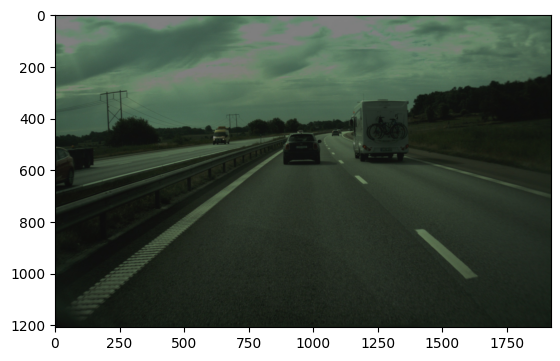

In [2]:
# Task 1 draw all boxes from one single annotator onto an image

## Loading image Example
img = image.imread('./annotation_consistency/image1_FC_34243.jpg')
plt.imshow(img)

### Drawing annotations (bouding box coordinates) onto image

You can draw bounding box using `Rectangle()` from *matplotlib.patches* class. The `Rectangle()` draws a rectangle whose dimensions are specified as its parameters `xy, width, height`. The `xy=(x,y)` parameter specifies the bottom and left rectangle coordinates. 

If you open annotations in the judgement JSON file, you will notice the following structure:
```json
"0": [
    {
      "boundaries": [
        {
          "boundaryPoints": [
            {
              "coords": [
                7.460422039031982,
                512.8555297851562
              ],
              "edge": "Bottom",
              "visible": true
            },
            {
              "coords": [
                0.6261528134346008,
                578.7573852539062
              ],
              "edge": "Left",
              "visible": true
            },
            {
              "coords": [
                51.3950080871582,
                667.11474609375
              ],
              "edge": "Top",
              "visible": true
            },
            {
              "coords": [
                74.82678985595703,
                581.6864013671875
              ],
              "edge": "Right",
              "visible": true
            }
          ],
          "cameraId": 0
        }
      ],
      "properties": {
        "ObjectID": 1
      },
      "selectionMethod": "outer_points",
      "type": "Vehicle"
    },
    ...
    ...
```
"0" denotes annotation entry from an annotator. The annotator has provided a number of bounding boxes (boundaries) whose coordinates are provided within the boundaryPoints. The coordinates are provided for the different edges (Bottom, Left, Top and Right) of the bounding box.  In order to draw the bounding box using `matplotlib.patches.Rectangle((x,  y), width, height)` you need to access the coordinates of each edge and get the correct parameters for the rectangle. 

Notice that coords are in a list of x,y (e.g., 74.82678985595703, 581.6864013671875). Therefore, you can assign all coords of x in one list and use them to get width by simply subtracting maximum value of x from the smallest value of x. Similarly, assign all y coords in order to compute the height. xy `matplotlib.patches.Rectangle((x,  y), width, height)`  value of the rectangle are the minimum values of x and y. 

<img src="annotation_consistency/box.png" alt="drawing" width="300"/>


#### Expected Answer

<img src="annotation_consistency/Task1.png" alt="drawing" width="300"/>

[(609.6201171875, 433.4197692871094), (0.282182514667511, 511.8747253417969), (881.1845703125, 456.4096984863281), (935.3576049804688, 446.7658386230469), (1069.2158203125, 447.96014404296875), (1089.972900390625, 445.4525451660156), (1136.6363525390625, 329.1734313964844)]


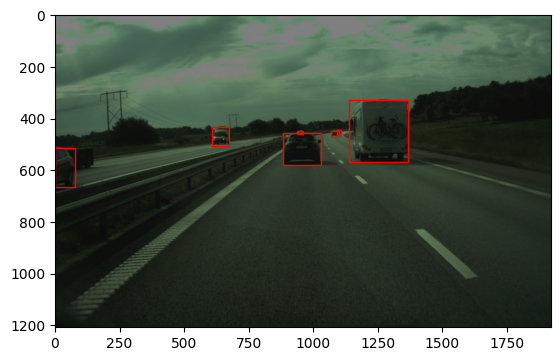

In [3]:
# Task 1 draw all boxes from one single annotator onto an image

# ======== Your Code ======== m
xy = []
x = []
y= []
width = []
height = []
f = open('./annotation_consistency/image1_FC_34243_judgements.json')
data = json.load(f)
for item in data["1"]:
    x_temp = []
    y_temp = []
    for boundary in item["boundaries"]:
        for subBoundary in boundary["boundaryPoints"]:
            x_temp.append(subBoundary["coords"][0])
            y_temp.append(subBoundary["coords"][1])
    
        xy.append((min(x_temp), min(y_temp)))
        width_cal = max(x_temp) - min(x_temp)
        height_cal = max(y_temp) - min(y_temp)
        width.append(width_cal)
        height.append(height_cal)
        
print(xy)

for i in range(len(xy)):
    sth = patches.Rectangle(xy[i],width[i],height[i],linewidth=1,edgecolor='r',facecolor='none')
    plt.gca().add_patch(sth) 

plt.imshow(img)

# ======== Your Code ======== 

## 2 Draw all boxes avalibale for the same image onto the imagee
In this second task, you will draw all the bounding boxes provided by all annotators onto the single image.
> **TASK 2.** Write code to draw all annotations available for an image. Note, you need to make small modification to above task

#### Expected Answer

<img src="annotation_consistency/Task2.png" alt="drawing" width="300"/>

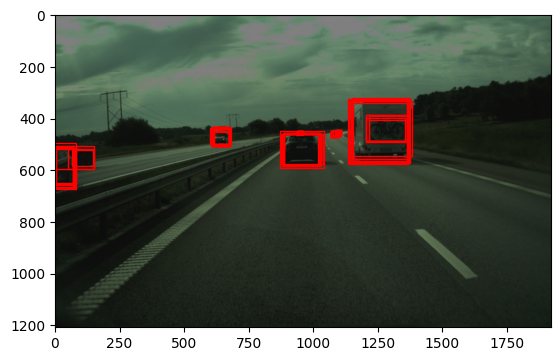

In [4]:
# Task 2 draw all boxes from all annotators onto an image 

# ======== Your Code ======== 


xy = []
x = []
y= []
width = []
height = []
f = open('./annotation_consistency/image1_FC_34243_judgements.json')
data = json.load(f)

for m in range(11):
    for item in data[str(m)]:
        x_temp = []
        y_temp = []
        for boundary in item["boundaries"]:
            for subBoundary in boundary["boundaryPoints"]:
                x_temp.append(subBoundary["coords"][0])
                y_temp.append(subBoundary["coords"][1])
    
            xy.append((min(x_temp), min(y_temp)))
            width_cal = max(x_temp) - min(x_temp)
            height_cal = max(y_temp) - min(y_temp)
            width.append(width_cal)
            height.append(height_cal)
        

for i in range(len(xy)):
    sth = patches.Rectangle(xy[i],width[i],height[i],edgecolor='r',facecolor='none')
    plt.gca().add_patch(sth) 

plt.imshow(img)




# ======== Your Code ======== 

## 1.3 Pick two annotators and draw their annotations onto an image 
In this task, you will select two annotators and draw the bounding boxes provided by the two annotators on a single image

> **TASK 3.** Write code to draw annotations available from two annotations onto an image.

#### Expected Answer

<img src="annotation_consistency/Task3.png" alt="drawing" width="300"/>

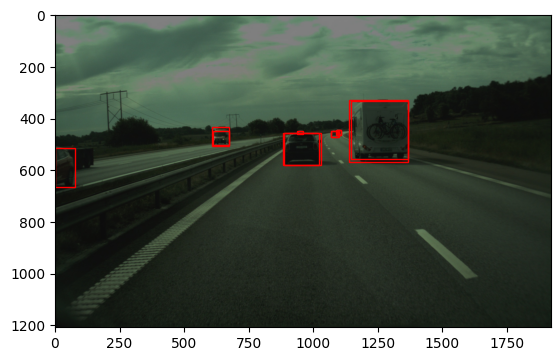

In [5]:
# Task 3 draw all boxes from two annotators onto an image
# ======== Your Code ======== 


xy = []
x = []
y= []
width = []
height = []
f = open('./annotation_consistency/image1_FC_34243_judgements.json')
data = json.load(f)

for m in range(11): 
    if m == 1 or m == 2:
        for item in data[str(m)]:
            x_temp = []
            y_temp = []
            for boundary in item["boundaries"]:
                for subBoundary in boundary["boundaryPoints"]:
                    x_temp.append(subBoundary["coords"][0])
                    y_temp.append(subBoundary["coords"][1])

                xy.append((min(x_temp), min(y_temp)))
                width_cal = max(x_temp) - min(x_temp)
                height_cal = max(y_temp) - min(y_temp)
                width.append(width_cal)
                height.append(height_cal)


for i in range(len(xy)):
    sth = patches.Rectangle(xy[i],width[i],height[i],edgecolor='r',facecolor='none')
    plt.gca().add_patch(sth) 

plt.imshow(img)



# ======== Your Code ======== 

## 4 Compute the IOU between the annotations of the two annotators

In this last task, you will compute the IOU from the annotations of the two annotators

> **TASK 4.** Write code to compute IOU from two annotators on a single image

Task 1.3 should give you the coordinates of the the bounding box. Use the following image to get an idea of how you can compute area of intersection as well as the total area of overlap in order to compute IOU.

<img src="annotation_consistency/iou.png" alt="drawing" width="600"/>


In [6]:
# Task 4 Compute IOU for all boxes from two annotators onto a single image

# ======== Your Code ========  
# ======== Your Code ======== 

firstAnnotation_max = []
firstAnnotation_min = []
secondAnnotation_max = []
secondAnnotation_min = []
iou = []

f = open('./annotation_consistency/image4_RB_131827_judgements.json')
data = json.load(f)

#iterate throught all the 11 annotations in the json file
for m in range(11): 
    #if the annotation equals 0 or 1
    if m == 0 or m == 1:
        # get the max and min edges
        for item in data[str(m)]:
            x_temp = []
            y_temp = []
            
            # Go through all the boundaries and get the edges for each to calculate their iou later
            for boundary in item["boundaries"]:
                for subBoundary in boundary["boundaryPoints"]:
                    x_temp.append(subBoundary["coords"][0])
                    y_temp.append(subBoundary["coords"][1])
                    
                if m == 0:
                    firstAnnotation_max.append((max(x_temp), min(y_temp)))
                    firstAnnotation_min.append((min(x_temp), max(y_temp)))
                if m == 1:
                    secondAnnotation_max.append((max(x_temp), min(y_temp)))
                    secondAnnotation_min.append((min(x_temp), max(y_temp)))
            
overlapRegion = []
combinedRegion = []

#get the edges of the overlap region by iterating over all the boundaries
for i in range(min(len(firstAnnotation_max), len(secondAnnotation_max))):
    X_1 = max(firstAnnotation_min[i][0], secondAnnotation_min[i][0])
    Y_1 = min(firstAnnotation_min[i][1], secondAnnotation_min[i][1])
    
    X_2 = min(firstAnnotation_max[i][0], secondAnnotation_max[i][0])
    Y_2 = max(firstAnnotation_max[i][1], secondAnnotation_max[i][1])
    
    width = X_2 - X_1
    height = Y_1 - Y_2
    S = 0
    if width > 0 and height > 0:
        S = width * height 
    
    overlapRegion.append(S)
    
    width_box1 = firstAnnotation_max[i][0] - firstAnnotation_min[i][0]
    height_box1 = firstAnnotation_min[i][1] - firstAnnotation_max[i][1]
    
    width_box2 = secondAnnotation_max[i][0] - secondAnnotation_min[i][0]
    height_box2 = secondAnnotation_min[i][1] - secondAnnotation_max[i][1]
    
    S_box1 = width_box1 * height_box1
    S_box2 = width_box2 * height_box2

    #calculate the combined region
    combined = S_box1 + S_box2 - S
    combinedRegion.append(combined)
    #save the iou for each boundary in an array
    iou.append(S/combined)

final_iou = 0
# get the mean value of all the ious in the image as the total iou
for i in range(len(iou)):
    print('IOU', i, ': ', iou[i])
    final_iou = final_iou + iou[i]
    
final_iou = final_iou/len(iou)
print(final_iou)


# ======== Your Code ======== 

IOU 0 :  0.9707104776383225
IOU 1 :  0.8881680596995106
0.9294392686689166
